In [8]:
from grenmlin import simulator, grn
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import visualize, get_input_signals, test_inputs

## 4:1 MUX
Formula:
$$
Y = (X_1 \cdot \overline S_1 \cdot \overline S_2) + (X_2 \cdot S_1 \cdot \overline S_2) + (X_3 \cdot \overline S_1 \cdot S_2) + (X_4 \cdot S_1 \cdot S_2) 
$$

In [9]:
my_grn = grn.grn()
# 6 input species
my_grn.add_input_species("X1")
my_grn.add_input_species("X2")
my_grn.add_input_species("X3")
my_grn.add_input_species("X4")
my_grn.add_input_species("S1")
my_grn.add_input_species("S2")

# 1 output species
my_grn.add_species("MUX", 0.1)

In [10]:
# X1 AND NOT S1 AND NOT S2
regulators = [{'name': 'X1', 'type': 1, 'Kd': 5, 'n': 2},
              {'name': 'S1', 'type': -1, 'Kd': 5, 'n': 3},
              {'name': 'S2', 'type': -1, 'Kd': 5, 'n': 3}]
products = [{'name': 'MUX'}]
my_grn.add_gene(10, regulators, products)

# X2 AND S1 AND NOT S2
regulators = [{'name': 'X2', 'type': 1, 'Kd': 5, 'n': 2},
              {'name': 'S1', 'type': 1, 'Kd': 5, 'n': 3},
              {'name': 'S2', 'type': -1, 'Kd': 5, 'n': 3}]
products = [{'name': 'MUX'}]
my_grn.add_gene(10, regulators, products)

# X3 AND NOT S1 AND S2
regulators = [{'name': 'X3', 'type': 1, 'Kd': 5, 'n': 2},
              {'name': 'S1', 'type': -1, 'Kd': 5, 'n': 3},
              {'name': 'S2', 'type': 1, 'Kd': 5, 'n': 3}]
products = [{'name': 'MUX'}]
my_grn.add_gene(10, regulators, products)

# X4 AND S1 AND S2
regulators = [{'name': 'X4', 'type': 1, 'Kd': 5, 'n': 2},
              {'name': 'S1', 'type': 1, 'Kd': 5, 'n': 3},
              {'name': 'S2', 'type': 1, 'Kd': 5, 'n': 3}]
products = [{'name': 'MUX'}]
my_grn.add_gene(10, regulators, products)

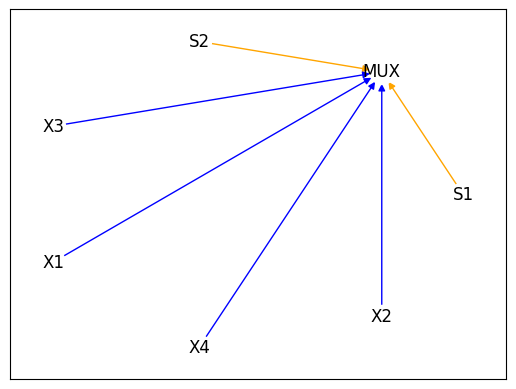

In [11]:
my_grn.plot_network()

In [12]:
inputs = get_input_signals(6, 100)
T, Y = simulator.simulate_sequence(my_grn, inputs, t_single = 250, plot_on=False)

c:\Users\Uporabnik\Projects\UC_HW2_GRNM\helper_functions.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


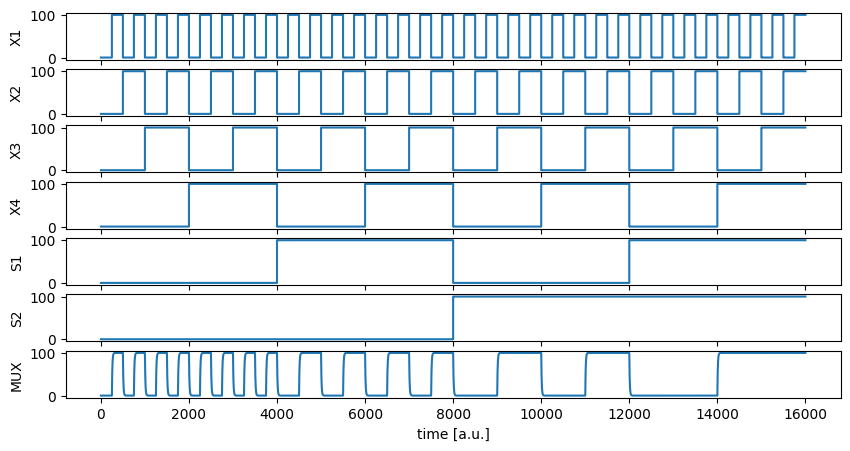

In [7]:
visualize(T, Y, my_grn)